In [ ]:
#Install required libraries
!pip install datasets nltk

#Imports
from datasets import load_dataset
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#Download NLTK data (run once)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

#Load full AG News dataset
dataset = load_dataset("ag_news")
data = dataset['train']
texts = data['text']  # All article texts

#Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

#Define preprocessing function
def custom_preprocess(text):
    # Step 1: Tokenize
    tokens = word_tokenize(text)

    # Step 2: Lowercase
    tokens = [token.lower() for token in tokens]

    # Step 3: Keep only alphabetic words
    tokens = [token for token in tokens if token.isalpha()]

    # Step 4: Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]

    # Step 5: Lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Step 6: Sort alphabetically (optional)
    tokens.sort()

    return tokens

#Apply preprocessing to all data
cleaned_tokens_all = [custom_preprocess(text) for text in texts]

# Show only 5 rows as example for explanation
print("\nShowing Preprocessing on First 5 Articles:\n")
for i in range(5):
    print(f"--- Article {i+1} ---")
    print("Original:", texts[i])
    print("Processed Tokens:", cleaned_tokens_all[i])



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]


Showing Preprocessing on First 5 Articles:

--- Article 1 ---
Original: Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.
Processed Tokens: ['back', 'bear', 'black', 'claw', 'green', 'reuters', 'reuters', 'seeing', 'street', 'wall', 'wall']
--- Article 2 ---
Original: Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.
Processed Tokens: ['aerospace', 'another', 'bet', 'carlyle', 'carlyle', 'commercial', 'defense', 'firm', 'group', 'industry', 'investment', 'look', 'making', 'market', 'part', 'play', 'private', 'quietly', 'reputation', 'reuters', 'reuters', 'toward']
--- Article 3 ---
Original: Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worr

In [ ]:
total_articles = len(dataset['train']) + len(dataset['test'])
print("📊 Total articles in AG News dataset:", total_articles)

📊 Total articles in AG News dataset: 127600


In [ ]:
# Import required NLTK components
import nltk
from nltk import pos_tag, RegexpParser
nltk.download('averaged_perceptron_tagger_eng')


#Download POS tagger (run once)
nltk.download('averaged_perceptron_tagger')

#Define chunk grammar for noun phrases
chunk_grammar = "NP: {<DT>?<JJ>*<NN.*>+}"  # Optional determiner + adjectives + 1+ nouns
chunk_parser = RegexpParser(chunk_grammar)

#Chunking function that takes preprocessed tokens and extracts noun phrases
def extract_noun_phrases(tokens):
    tagged = pos_tag(tokens)  # POS tagging
    tree = chunk_parser.parse(tagged)

    chunks = []
    for subtree in tree.subtrees():
        if subtree.label() == 'NP':
            phrase = ' '.join(word for word, tag in subtree.leaves())
            chunks.append(phrase.lower())
    return chunks

#Apply chunking to all preprocessed data
chunked_texts = [extract_noun_phrases(tokens) for tokens in cleaned_tokens_all]

# Show first 5 rows (original, cleaned, chunked)
print("\nShowing Noun Phrase Extraction on First 5 Articles:\n")
for i in range(5):
    print(f"--- Article {i+1} ---")
    print("Original:", texts[i])
    print("Cleaned Tokens:", cleaned_tokens_all[i])
    print("Extracted Noun Phrases:", chunked_texts[i])



[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.



Showing Noun Phrase Extraction on First 5 Articles:

--- Article 1 ---
Original: Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.
Cleaned Tokens: ['back', 'bear', 'black', 'claw', 'green', 'reuters', 'reuters', 'seeing', 'street', 'wall', 'wall']
Extracted Noun Phrases: ['bear black claw', 'green reuters reuters', 'street wall wall']
--- Article 2 ---
Original: Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.
Cleaned Tokens: ['aerospace', 'another', 'bet', 'carlyle', 'carlyle', 'commercial', 'defense', 'firm', 'group', 'industry', 'investment', 'look', 'making', 'market', 'part', 'play', 'private', 'quietly', 'reputation', 'reuters', 'reuters', 'toward']
Extracted Noun Phrases

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ✅ Join chunked noun phrases back into text format
chunked_sentences = [' '.join(phrases) for phrases in chunked_texts]

# ✅ Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# ✅ Transform the chunked noun phrase data into a TF-IDF matrix
X = vectorizer.fit_transform(chunked_sentences)

# ✅ Show some info about the TF-IDF matrix
print("✅ TF-IDF Matrix Shape:", X.shape)  # (rows = articles, columns = features)
print("📊 Example Feature Names:", vectorizer.get_feature_names_out()[:10])


✅ TF-IDF Matrix Shape: (120000, 45187)
📊 Example Feature Names: ['aa' 'aaa' 'aac' 'aachen' 'aai' 'aaii' 'aalborg' 'aaliyah' 'aap' 'aapl']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

#Step 1: Get the labels (same order as cleaned texts)
y = dataset['train']['label']  # These are the true categories: 0–3

#Step 2: Split data into training and testing sets (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Step 3: Train the Logistic Regression model
start = time.time()
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
print(f"Model trained in {round(time.time() - start, 2)} seconds.")

#Step 4: Evaluate on test set
y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {round(accuracy * 100, 2)}%")


Model trained in 38.38 seconds.
Logistic Regression Accuracy: 90.55%


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Step 1: Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#Step 2: Train the model
start = time.time()
rf_model.fit(X_train, y_train)
print(f"Random Forest trained in {round(time.time() - start, 2)} seconds.")

#Step 3: Evaluate on the test set
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {round(rf_accuracy * 100, 2)}%")


Random Forest trained in 652.45 seconds.
Random Forest Accuracy: 88.6%


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)

# Evaluate accuracy
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("📊 Naive Bayes Accuracy:", round(nb_accuracy * 100, 2), "%")


📊 Naive Bayes Accuracy: 89.98 %


In [ ]:
import numpy as np

#Get the feature (noun phrase) names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

#Get the class labels
class_labels = dataset['train'].features['label'].names  # ['World', 'Sports', 'Business', 'Sci/Tech']

#Show top 10 noun phrases for each class
for i, class_name in enumerate(class_labels):
    top_indices = np.argsort(logreg_model.coef_[i])[-10:]  # Top 10 features with highest weights
    top_phrases = [feature_names[j] for j in top_indices]

    print(f"\nTop Noun Phrases for Class '{class_name}':")
    for phrase in reversed(top_phrases):  # Highest weight first
        print(f"• {phrase}")



Top Noun Phrases for Class 'World':
• afp
• iraq
• iraqi
• hostage
• palestinian
• minister
• arafat
• un
• nuclear
• leader

Top Noun Phrases for Class 'Sports':
• coach
• cup
• team
• sport
• league
• champion
• stadium
• player
• baseball
• season

Top Noun Phrases for Class 'Business':
• http
• retailer
• oil
• company
• economy
• airline
• hellip
• bank
• tax
• profit

Top Noun Phrases for Class 'Sci/Tech':
• space
• internet
• scientist
• software
• nasa
• technology
• apple
• study
• linux
• online


In [ ]:
import numpy as np
import pandas as pd

#Get feature importances from Random Forest
importances = rf_model.feature_importances_
feature_names = vectorizer.get_feature_names_out()

#Create a DataFrame for easier analysis
feature_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

#Sort by importance and take top 20 features
top_features = feature_df.sort_values(by='importance', ascending=False).head(20)
print("Top 20 Most Important Noun Phrases (Overall):")
print(top_features)

#Now, analyze per-class average TF-IDF values for these features
X_dense = X.toarray()  # convert sparse matrix to dense

print("\nClass Association (Average TF-IDF Value per Class for Each Feature):")
for _, row in top_features.iterrows():
    feature = row['feature']
    index = vectorizer.vocabulary_.get(feature)
    print(f"\nFeature: {feature}")
    for i, class_name in enumerate(class_labels):
        class_mask = (np.array(y) == i)
        avg_value = X_dense[class_mask, index].mean()
        print(f"   → {class_name}: {round(avg_value, 5)}")


Top 20 Most Important Noun Phrases (Overall):
         feature  importance
7982     company    0.009783
15328       game    0.008971
39638       team    0.008083
20063       iraq    0.007787
28011        oil    0.007165
25483   minister    0.006881
35374     season    0.006723
37107   software    0.006674
19815   internet    0.006137
31111      price    0.005702
31036  president    0.005686
7601       coach    0.005655
9328         cup    0.005573
25251  microsoft    0.005550
38214      stock    0.005487
22456     league    0.005361
22448     leader    0.004914
31280     profit    0.004893
27258      night    0.004888
37362      space    0.004853

Class Association (Average TF-IDF Value per Class for Each Feature):

Feature: company
   → World: 0.00165
   → Sports: 0.00035
   → Business: 0.02129
   → Sci/Tech: 0.01623

Feature: game
   → World: 0.00086
   → Sports: 0.02353
   → Business: 0.0009
   → Sci/Tech: 0.00766

Feature: team
   → World: 0.00139
   → Sports: 0.01868
   → Business

In [ ]:
# Make sure this is defined once
label_names = dataset['train'].features['label'].names

# Logistic Regression Predictions
print("🔵 Predictions using Logistic Regression\n")

for i in range(5):
    original = texts[i]

    # Preprocess and chunk
    tokens = custom_preprocess(original)
    phrases = extract_noun_phrases(tokens)
    input_text = ' '.join(phrases)

    # Vectorize and predict
    vectorized = vectorizer.transform([input_text])
    pred = logreg_model.predict(vectorized)[0]

    print(f"📰 Article {i+1}")
    print("Text:", original)
    print("Predicted Category:", label_names[pred])



🔵 Predictions using Logistic Regression

📰 Article 1
Text: Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.
Predicted Category: Business
📰 Article 2
Text: Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.
Predicted Category: Business
📰 Article 3
Text: Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.
Predicted Category: Business
📰 Article 4
Text: Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq aft

In [ ]:
print("Predictions using Random Forest\n")

for i in range(5):
    original = texts[i]

    # Preprocess and chunk
    tokens = custom_preprocess(original)
    phrases = extract_noun_phrases(tokens)
    input_text = ' '.join(phrases)

    # Vectorize
    vectorized = vectorizer.transform([input_text])

    # Predict
    pred = rf_model.predict(vectorized)[0]

    print(f"📰 Article {i+1}")
    print("Text:", original)
    print("Predicted Category:", label_names[pred])



Predictions using Random Forest

📰 Article 1
Text: Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.
Predicted Category: Business
📰 Article 2
Text: Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.
Predicted Category: Business
📰 Article 3
Text: Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.
Predicted Category: Business
📰 Article 4
Text: Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intel

In [ ]:
# Make sure this is defined
label_names = dataset['train'].features['label'].names

print("🟢 Predictions using Naive Bayes\n")

for i in range(5):
    original = texts[i]

    # Preprocess and chunk
    tokens = custom_preprocess(original)
    phrases = extract_noun_phrases(tokens)
    input_text = ' '.join(phrases)

    # Vectorize and predict
    vectorized = vectorizer.transform([input_text])
    pred = nb_model.predict(vectorized)[0]

    print(f"📰 Article {i+1}")
    print("Text:", original)
    print("Predicted Category:", label_names[pred])


🟢 Predictions using Naive Bayes

📰 Article 1
Text: Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.
Predicted Category: Business
📰 Article 2
Text: Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.
Predicted Category: Business
📰 Article 3
Text: Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.
Predicted Category: Business
📰 Article 4
Text: Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intel

<Figure size 600x600 with 0 Axes>

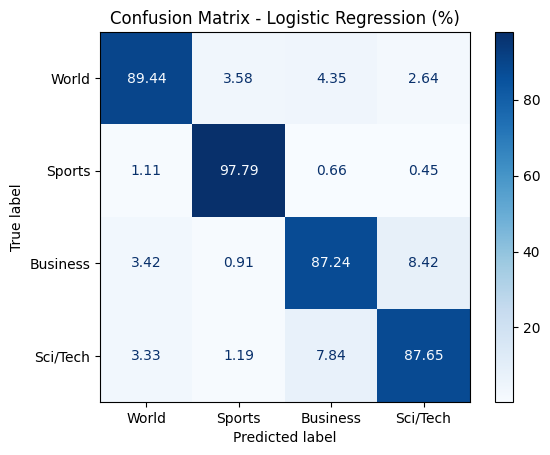

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix as percentages
cm_logreg = confusion_matrix(y_test, y_pred, normalize='true') * 100  # Normalize by row
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=label_names)

plt.figure(figsize=(6, 6))
disp_logreg.plot(cmap='Blues', values_format='.2f')  # show percentages
plt.title("Confusion Matrix - Logistic Regression (%)")
plt.show()


<Figure size 600x600 with 0 Axes>

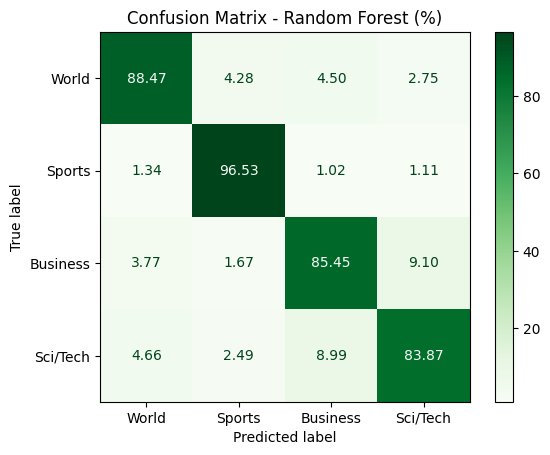

In [ ]:
#Confusion matrix as percentages
cm_rf = confusion_matrix(y_test, rf_pred, normalize='true') * 100  # Normalize by row
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=label_names)

plt.figure(figsize=(6, 6))
disp_rf.plot(cmap='Greens', values_format='.2f')  # show percentages
plt.title("Confusion Matrix - Random Forest (%)")
plt.show()


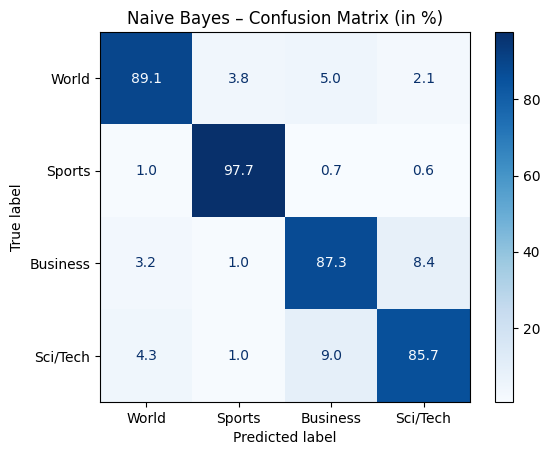

In [ ]:
# Compute raw confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Normalize per row (true class) to percentages
cm_nb_percent = cm_nb.astype('float') / cm_nb.sum(axis=1)[:, np.newaxis] * 100

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb_percent, display_labels=label_names)
disp.plot(cmap='Blues', values_format=".1f")
plt.title("Naive Bayes – Confusion Matrix (in %)")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print("🔵 Logistic Regression – Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_names))

print("\n🟢 Random Forest – Classification Report:\n")
print(classification_report(y_test, rf_pred, target_names=label_names))

print("\n🟣 Naive Bayes – Classification Report:\n")
print(classification_report(y_test, y_pred_nb, target_names=label_names))



🔵 Logistic Regression – Classification Report:

              precision    recall  f1-score   support

       World       0.92      0.89      0.91      5956
      Sports       0.95      0.98      0.96      6058
    Business       0.87      0.87      0.87      5911
    Sci/Tech       0.89      0.88      0.88      6075

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000


🟢 Random Forest – Classification Report:

              precision    recall  f1-score   support

       World       0.90      0.88      0.89      5956
      Sports       0.92      0.97      0.94      6058
    Business       0.85      0.85      0.85      5911
    Sci/Tech       0.87      0.84      0.85      6075

    accuracy                           0.89     24000
   macro avg       0.89      0.89      0.89     24000
weighted avg       0.89      0.89      0.89     24000


🟣 Naive Bayes – Classification Report: